In [55]:
library(Seurat)
library(dplyr)
library(Matrix)
library(patchwork)
library(ggplot2)

adata<-readRDS(file="/home/liusong/scRNA/endometriosis/V3data/Downloaded_scRNA_data/NG_EMS/aux.seurat.shared.rds")
rawdata<-GetAssayData(adata,slot="counts")
rb.genes<-rownames(adata)[grep("^RP[SL]",rownames(adata))]
rawdata<-rawdata[!(rownames(rawdata) %in% rb.genes),]
ndata <- CreateSeuratObject(count = rawdata)

Ostromalcon<-read.csv(file="/home/liusong/scRNA/endometriosis/V3data/Downloaded_scRNA_data/NG_EMS/NG_OVCON_Ostroma/obs.csv",header=TRUE)
Ostromals<-read.csv(file="/home/liusong/scRNA/endometriosis/V3data/Downloaded_scRNA_data/NG_EMS/NG_OMA_Ostromas/obs.csv",header=TRUE)
head(Ostromalcon)
head(Ostromals)

,X,orig.ident,nCount_RNA,nFeature_RNA,Major.Class,celltype,Menstrual,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sampleID,leiden,myname,newcelltype
,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
1,AAACCCAAGTAACGTA-sample9,0,2808,1370,Unaffected ovary,Mesenchymal cells,NA,1291,2023,233,11.517549,sample9,0,Ostroma0,Ostroma
2,AAACCCAAGTGGTGGT-sample9,0,2605,976,Unaffected ovary,Mesenchymal cells,NA,899,1465,196,13.378839,sample9,0,Ostroma0,Ostroma
3,AAACCCACAAACTAGA-sample9,0,2662,1076,Unaffected ovary,Mesenchymal cells,NA,999,1777,246,13.843557,sample9,3,Ostroma3,Ostroma
4,AAACCCACAACACAGG-sample9,0,2888,1545,Unaffected ovary,Mesenchymal cells,NA,1466,2135,257,12.037471,sample9,0,Ostroma0,Ostroma
5,AAACCCACAACAGCCC-sample9,0,2811,1269,Unaffected ovary,Mesenchymal cells,NA,1189,1873,182,9.717031,sample9,0,Ostroma0,Ostroma
6,AAACCCACAGAAACCG-sample9,0,2810,1350,Unaffected ovary,Mesenchymal cells,NA,1271,1816,191,10.517621,sample9,0,Ostroma0,Ostroma


,X,orig.ident,nCount_RNA,nFeature_RNA,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sampleID,cellID,leiden,celltype,myname,newcelltype,Menstrual,subtype
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AACTCCCGTACTTCTT-sample1,0,904,410,335,525,2,0.3809524,sample1,Mesenchymal cells,1,Mesenchymal cells,OstromaB1,Ostroma,Luteal,OstromaB
2,ACCTTTATCTGCGGCA-sample1,0,1267,466,392,710,54,7.6056337,sample1,B/Plasma cells,5,B/Plasma cells,OstromaA5,Ostroma,Luteal,OstromaA
3,AGATTGCCATCGATGT-sample1,0,545,248,197,436,1,0.2293578,sample1,Erythrocytes,5,Erythrocytes,OstromaA5,Ostroma,Luteal,OstromaA
4,ATGAGGGAGGCATGTG-sample1,0,405,255,210,310,3,0.9677420,sample1,Erythrocytes,5,Erythrocytes,OstromaA5,Ostroma,Luteal,OstromaA
5,CCTCAGTAGATAGGAG-sample1,0,522,283,253,484,12,2.4793390,sample1,Erythrocytes,5,Erythrocytes,OstromaA5,Ostroma,Luteal,OstromaA
6,CCTTCCCAGGTCGGAT-sample1,0,613,276,200,318,13,4.0880504,sample1,Myeloid cells,5,Myeloid cells,OstromaA5,Ostroma,Luteal,OstromaA


In [56]:
Ostromalsdata<-Ostromals[,c(1,9,10,11,15,16)]
Ostromalsdata$Major.Class<-rep("Endometrioma",nrow(Ostromalsdata))
#head(Ostromalsdata)
Ostromalcondata<-Ostromalcon[,c(1,12,6,13,7,15)]
Ostromalcondata$Major.Class<-rep("Unaffected Ovary",nrow(Ostromalcondata))
#head(Ostromalcondata)
colnames(Ostromalcondata)<-colnames(Ostromalsdata)
OVstromals<-rbind(Ostromalsdata,Ostromalcondata)

set.seed(12345)
mystromals<-sample(as.character(OVstromals$X),20000)
subdata<-OVstromals[OVstromals$X %in% mystromals,]
head(subdata)
tail(subdata)
Ostromal <- subset (ndata, cells= subdata$X)

metaO<-Ostromal@meta.data
metaO$X<-rownames(metaO)
newmeta<-plyr::join(metaO,subdata,by="X")

Ostromal@meta.data$subtype<-newmeta$subtype
Ostromal@meta.data$Major.Class<-newmeta$Major.Class
Ostromal@meta.data$sampleID<-newmeta$sampleID
head(Ostromal@meta.data)
tail(Ostromal@meta.data)

,X,sampleID,cellID,leiden,Menstrual,subtype,Major.Class
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
15,TACCTATAGCGTGAAC-sample1,sample1,Mesenchymal cells,5,Luteal,OstromaA,Endometrioma
18,TGACGGCCACTTCGAA-sample1,sample1,Mesenchymal cells,1,Luteal,OstromaB,Endometrioma
20,TTGACTTTCGACAGCC-sample1,sample1,Mesenchymal cells,1,Luteal,OstromaB,Endometrioma
24,AAACCTGTCTTGTCAT-sample2,sample2,Mesenchymal cells,5,Luteal,OstromaA,Endometrioma
28,AAAGTAGAGCTGCCCA-sample2,sample2,Mesenchymal cells,2,Luteal,OstromaA,Endometrioma
32,AACCATGTCCTTGGTC-sample2,sample2,Mesenchymal cells,1,Luteal,OstromaB,Endometrioma


,X,sampleID,cellID,leiden,Menstrual,subtype,Major.Class
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
65572,TTTGGTTAGCAATAGT-sample41,sample41,Mesenchymal cells,6,NA,Ostroma,Unaffected Ovary
65574,TTTGGTTAGCGTGTCC-sample41,sample41,Mesenchymal cells,6,NA,Ostroma,Unaffected Ovary
65578,TTTGGTTCAGTTAGAA-sample41,sample41,Mesenchymal cells,1,NA,Ostroma,Unaffected Ovary
65584,TTTGGTTTCTTTACAC-sample41,sample41,Mesenchymal cells,0,NA,Ostroma,Unaffected Ovary
65587,TTTGTTGGTAACTAAG-sample41,sample41,Mesenchymal cells,4,NA,Ostroma,Unaffected Ovary
65590,TTTGTTGGTGGGCTTC-sample41,sample41,T/NK cells,3,NA,Ostroma,Unaffected Ovary


,orig.ident,nCount_RNA,nFeature_RNA,subtype,Major.Class,sampleID
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
TACCTATAGCGTGAAC-sample1,SeuratProject,905,272,OstromaA,Endometrioma,sample1
TGACGGCCACTTCGAA-sample1,SeuratProject,1217,412,OstromaB,Endometrioma,sample1
TTGACTTTCGACAGCC-sample1,SeuratProject,1855,1002,OstromaB,Endometrioma,sample1
AAACCTGTCTTGTCAT-sample2,SeuratProject,1778,452,OstromaA,Endometrioma,sample2
AAAGTAGAGCTGCCCA-sample2,SeuratProject,2080,1438,OstromaA,Endometrioma,sample2
AACCATGTCCTTGGTC-sample2,SeuratProject,1942,1057,OstromaB,Endometrioma,sample2


,orig.ident,nCount_RNA,nFeature_RNA,subtype,Major.Class,sampleID
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
TTTGATCCAATGACCT-sample42,SeuratProject,1816,1046,OstromaA,Endometrioma,sample42
TTTGATCGTCCTATAG-sample42,SeuratProject,1369,352,OstromaA,Endometrioma,sample42
TTTGATCTCACCATCC-sample42,SeuratProject,1683,871,OstromaA,Endometrioma,sample42
TTTGATCTCCACCCTA-sample42,SeuratProject,1572,704,OstromaA,Endometrioma,sample42
TTTGGAGAGCAACTCT-sample42,SeuratProject,1463,878,OstromaA,Endometrioma,sample42
TTTGTTGTCGTGGTAT-sample42,SeuratProject,1184,495,OstromaA,Endometrioma,sample42


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"CombinePlots is being deprecated. Plots should now be combined using the patchwork system."


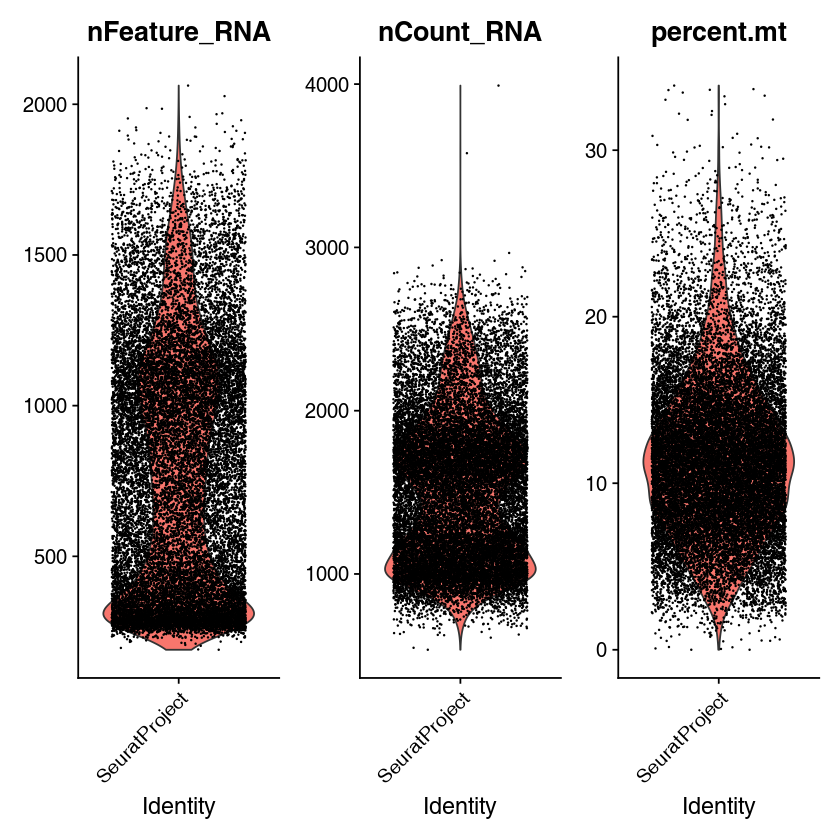

Normalizing layer: counts

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"CombinePlots is being deprecated. Plots should now be combined using the patchwork system."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"


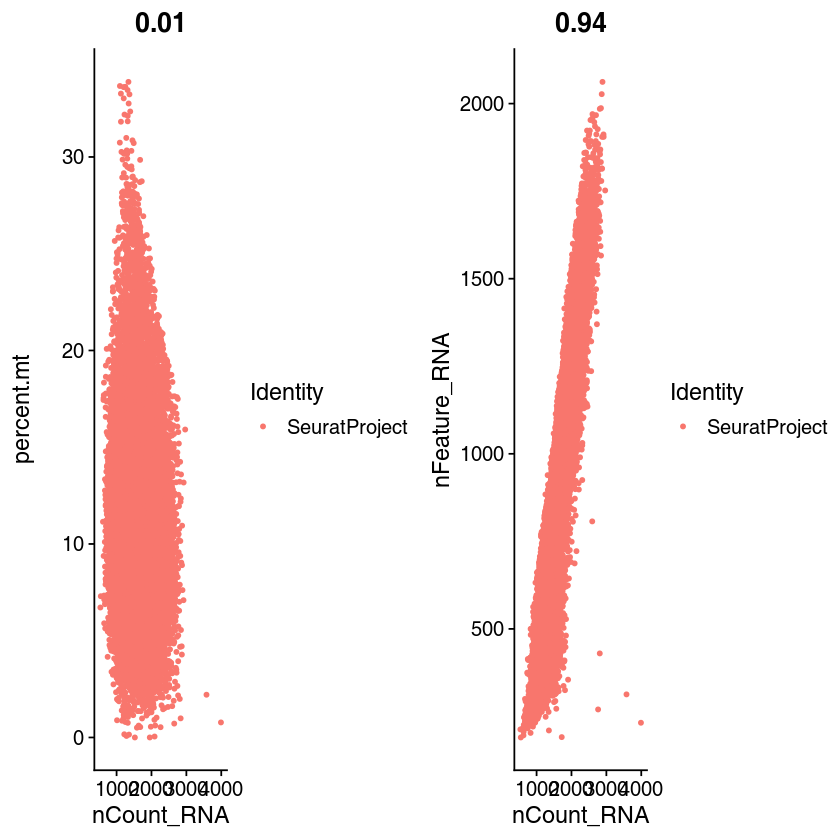

Regressing out nCount_RNA, percent.mt

Centering and scaling data matrix



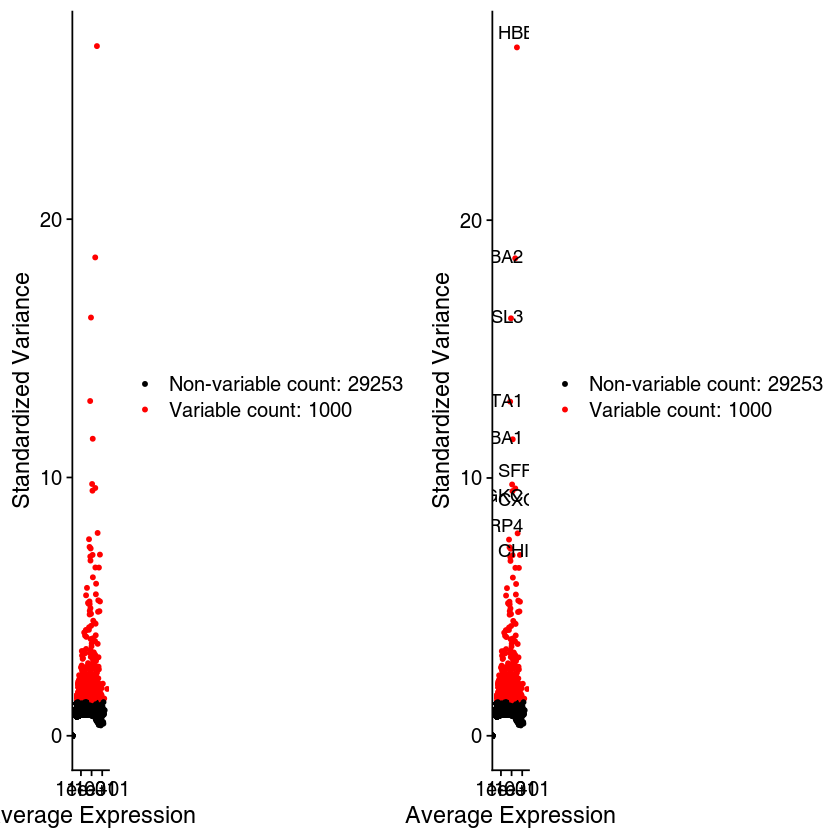

In [57]:
Ostromal[["percent.mt"]] <- PercentageFeatureSet(Ostromal, pattern = "^MT-")
VlnPlot(Ostromal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(Ostromal, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(Ostromal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Ostromal <- NormalizeData(object = Ostromal, normalization.method = "LogNormalize", scale.factor = 10000)
Ostromal <- FindVariableFeatures(object = Ostromal,selection.method = "vst", nfeatures=1000)
top10 <- head(VariableFeatures(Ostromal), 10)
top1000 <- head(VariableFeatures(Ostromal), 1000)
plot1 <- VariableFeaturePlot(Ostromal)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
all.genes <- rownames(Ostromal)

Ostromal <- ScaleData(Ostromal,vars.to.regress = c("nCount_RNA", "percent.mt"))




An object of class Seurat 
30253 features across 20000 samples within 1 assay 
Active assay: RNA (30253 features, 1000 variable features)
 3 layers present: counts, data, scale.data

PC_ 1 
Positive:  IGFBP5, HBB, INTS6, HBA2, KLF4, MAFB, STAR, ADAMTS1, DPT, HBA1 
	   CFD, DLK1, JUN, DDIT4, AC007952.4, GSN, MYC, JUNB, G0S2, ADM 
	   IRF1, SOCS3, CEBPB, Z93241.1, CYCS, ZNF331, ATF3, ID1, CRYGD, RASD1 
Negative:  CTHRC1, SFRP4, HOPX, COL1A2, COL3A1, VCAN, COL10A1, CTGF, COL8A1, FNDC1 
	   BGN, MGP, COL1A1, SPARC, C3, RARRES1, TIMP1, THBS2, LXN, CYR61 
	   NNMT, COL11A1, SEMA3C, COL5A2, IGFBP2, SFRP2, THBS1, FN1, COMP, HSPA1A 
PC_ 2 
Positive:  SNHG29, EEF1G, NME2, GAS5, SEPTIN7, GASK1B, COL1A1, RESF1, SPRR2F, MIR503HG 
	   SEPTIN2, COL1A2, IFI6, CCN2, SNHG6, RNASEK, ISLR, COL3A1, CIAO2B, HELLPAR 
	   SPARC, MRPS24, SNHG14, SNHG16, MICOS13, PLAAT3, MICOS10, FN1, SNHG5, POLR2J3 
Negative:  JUNB, FOSB, ZFP36, SOCS3, MYC, EGR1, GADD45B, IER3, IRF1, DNAJB1 
	   GEM, ICAM1, GPRC5A, KLF4, FOS, NAMPT, ATF3, CXCL2, REL, C11orf96 
	   BTG2, EGR3, EMP1, CCL2, CYCS, NR4A1, GADD45A, CEBPB, KDM6B, TNFRSF12A 
PC_ 3 
Positive:  SNHG29, GAS5, EEF1G, NME2, SNHG5, SEPTIN7, SNHG6, CCN1,

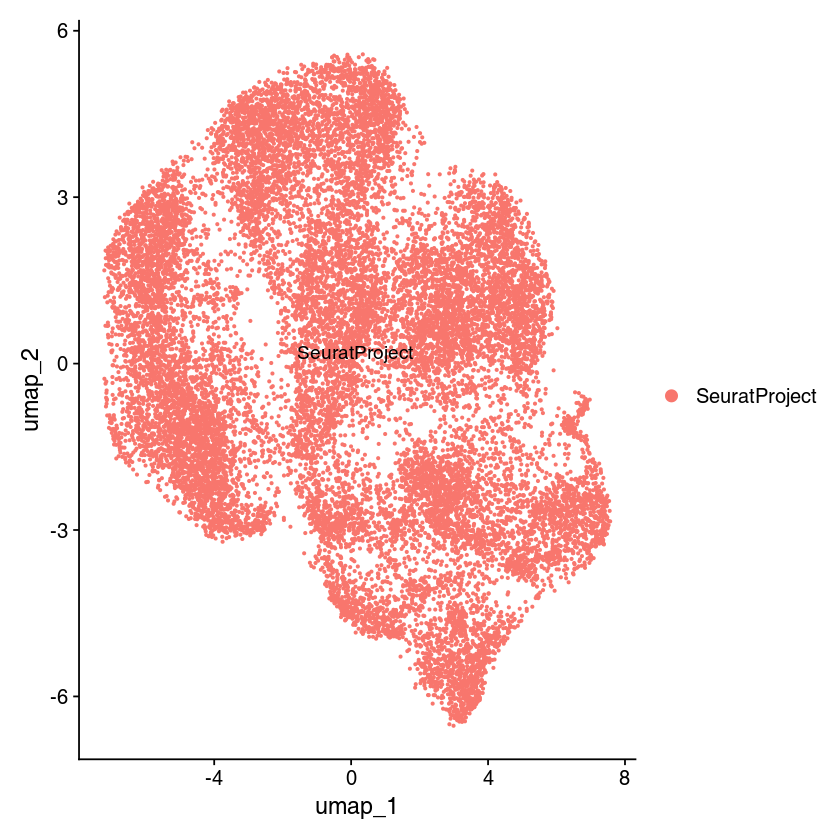

Calculating cluster Endometrioma

Calculating cluster Unaffected Ovary



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,4.856543,0.700,0.059,0,Endometrioma,C3
0,2.381367,0.769,0.267,0,Endometrioma,TAGLN
0,4.604086,0.517,0.055,0,Endometrioma,SFRP4
0,2.109838,0.582,0.155,0,Endometrioma,SEPT7
0,1.826933,0.570,0.171,0,Endometrioma,FN1
0,1.577836,0.505,0.136,0,Endometrioma,VMP1


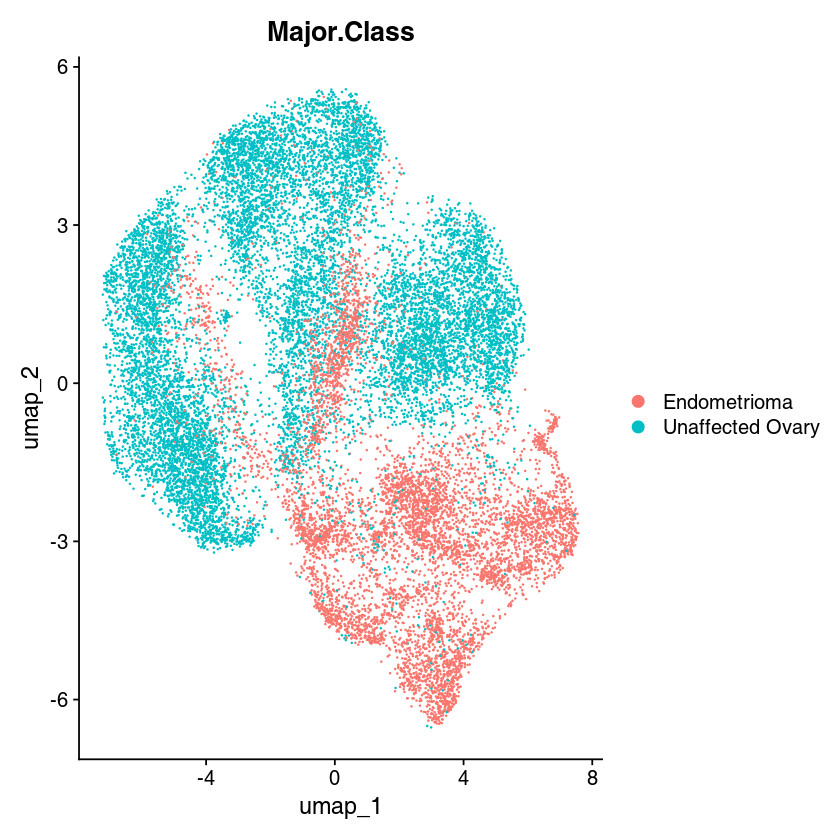

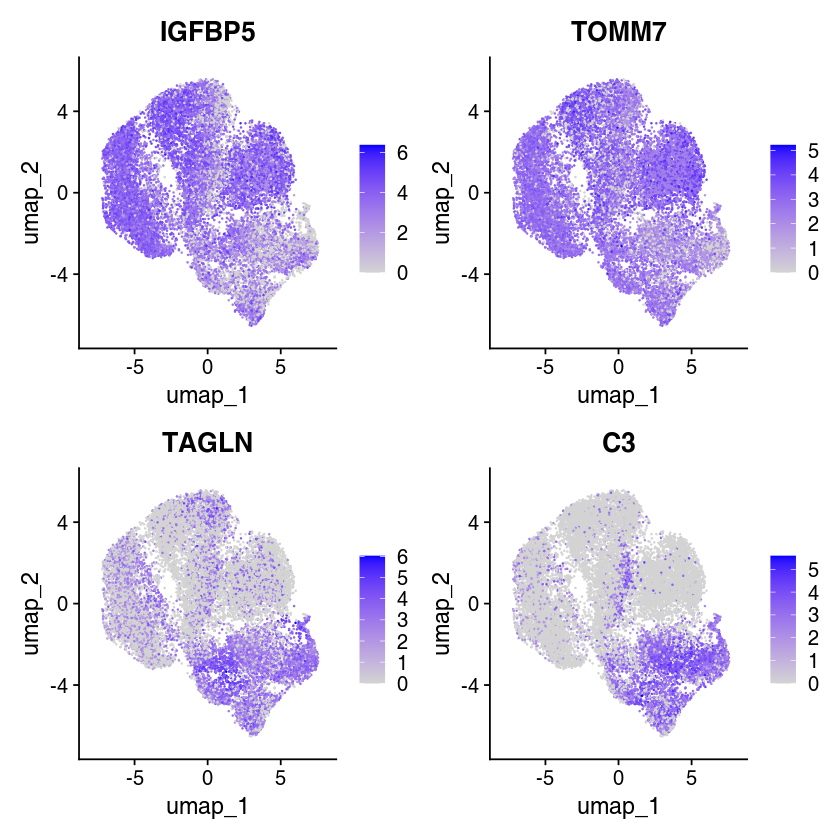

In [58]:
Ostromal
Ostromal <- RunPCA(object = Ostromal, features = top1000)
Ostromal <- RunUMAP(Ostromal, dims = 1:15)
DimPlot(Ostromal, reduction = "umap", label = TRUE, pt.size=0.5)
DimPlot(Ostromal, group.by="Major.Class")
Idents(Ostromal)<-"Major.Class"
markersA<-FindAllMarkers(object = Ostromal, only.pos = TRUE, min.pct = 0.5, thresh.use =1)
top10 <- markersA %>% group_by(cluster) %>% top_n(10, avg_log2FC)
head(top10)
FeaturePlot(Ostromal,features=c("IGFBP5","TOMM7","TAGLN","C3"))


Calculating cluster Ostroma

Calculating cluster OstromaA

Calculating cluster OstromaB



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IGFBP5,0,1.8480955,0.894,0.656,0,Ostroma,IGFBP5
TXNIP,0,1.3174358,0.663,0.460,0,Ostroma,TXNIP
ZFAS1,0,1.2606546,0.820,0.712,0,Ostroma,ZFAS1
TOMM7,0,1.0295321,0.881,0.801,0,Ostroma,TOMM7
HSP90AB1,0,0.9891013,0.981,0.918,0,Ostroma,HSP90AB1
H3F3B,0,1.1232844,0.988,0.941,0,Ostroma,H3F3B


Warning message:
"Scaling data with a low number of groups may produce misleading results"


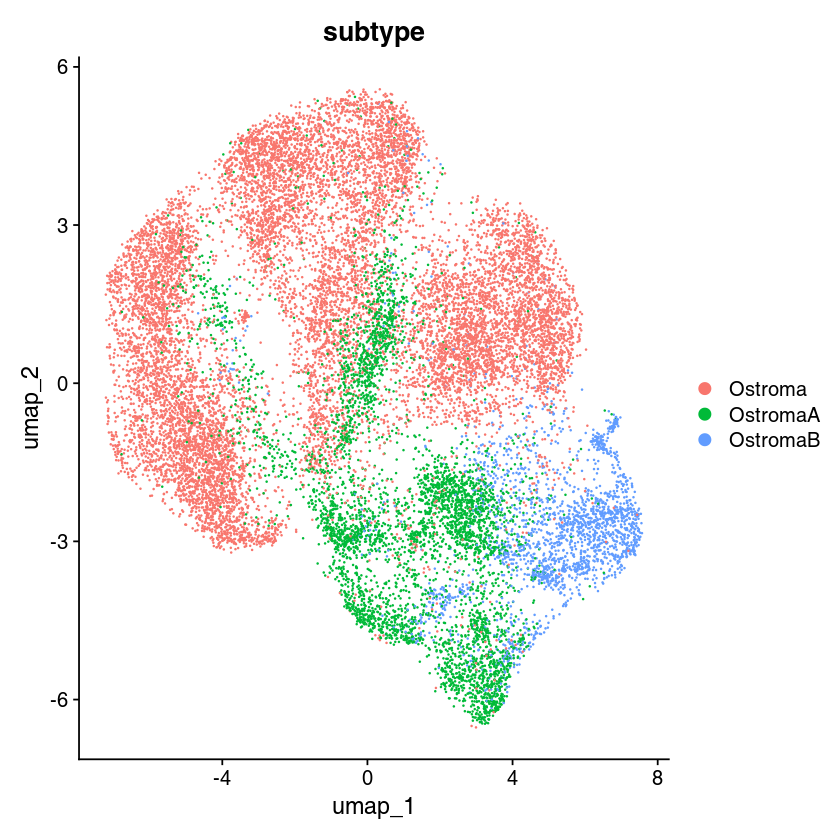

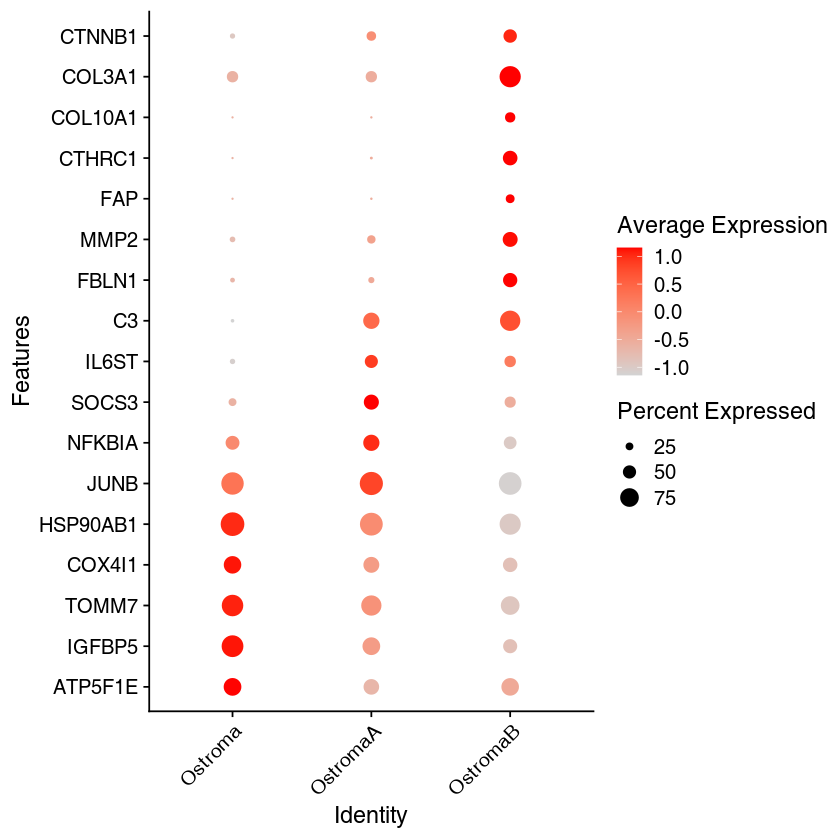

In [59]:
DimPlot(Ostromal,group.by="subtype")
Idents(Ostromal)<-"subtype"
levels(Ostromal)<-c("Ostroma","OstromaA","OstromaB")
threegroup.markers <- FindAllMarkers(object = Ostromal, only.pos = TRUE, min.pct = 0.5)
top100 <- threegroup.markers %>% group_by(cluster) %>% top_n(100, avg_log2FC)
OVdiffgene<-threegroup.markers[threegroup.markers$p_val_adj<0.05,]
head(OVdiffgene)
DotPlot(Ostromal,features=c("ATP5F1E","IGFBP5","TOMM7","COX4I1","HSP90AB1","JUNB","NFKBIA","SOCS3","IL6ST","C3","FBLN1","MMP2","FAP","CTHRC1","COL10A1","COL3A1","CTNNB1"),cols=c("lightgrey","red"))+RotatedAxis()+ggplot2:::coord_flip()


[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MAP"         
[16] "OMIM"         "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"        
[21] "PMID"         "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIPROT"

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(OVdiffgene$gene, fromType = "SYMBOL", toType = "ENTREZID", :
"5.24% of input gene IDs are fail to map..."


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,ACTA2,0.000000e+00,2.1502596,0.637,0.193,0.000000e+00,OstromaB,59
2,ACTB,1.368723e-149,0.6788038,0.979,0.897,4.140797e-145,OstromaB,60
3,ACTG1,6.387384e-29,0.1527461,0.982,0.957,1.932375e-24,Ostroma,71
4,ADIRF,2.602820e-179,1.2893759,0.544,0.464,7.874311e-175,Ostroma,10974
5,AEBP1,3.571830e-231,0.7888543,0.600,0.315,1.080586e-226,OstromaA,165
6,AEBP1,0.000000e+00,1.4400319,0.785,0.334,0.000000e+00,OstromaB,165


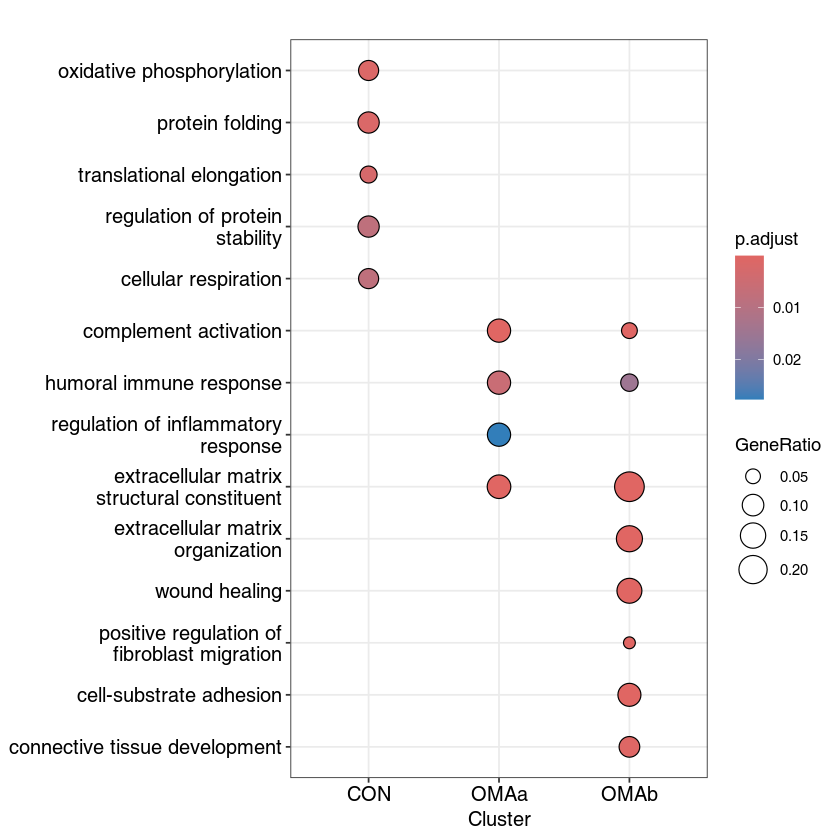

In [60]:
library(enrichplot)
library(DOSE)
library("clusterProfiler")
idType(OrgDb = "org.Hs.eg.db")

geneida<-bitr(OVdiffgene$gene,fromType="SYMBOL",toType="ENTREZID",OrgDb="org.Hs.eg.db")
colnames(geneida)<-c("gene","ENTREZID")
mydata<-merge(OVdiffgene,geneida,by="gene")
head(mydata)
OstromaA<-mydata$ENTREZID[mydata$cluster=="OstromaA"]
OstromaB<-mydata$ENTREZID[mydata$cluster=="OstromaB"]
Condata<-mydata$ENTREZID[mydata$cluster=="Ostroma"]

gcSample<-list(CON=Condata,OMAa=OstromaA,OMAb=OstromaB)
xy <- compareCluster(gcSample, fun="enrichGO",OrgDb="org.Hs.eg.db",ont="All")
dotplot(xy,showCategory=c('protein folding','regulation of protein stability','oxidative phosphorylation','cellular respiration','translational elongation','complement activation','regulation of inflammatory response','activation of immune response','humoral immune response','extracellular matrix structural constituent','extracellular matrix organization','cell-substrate adhesion','wound healing','positive regulation of fibroblast migration','connective tissue development'))
